In [1]:
!conda env list

# conda environments:
#
base                     C:\Users\Benya\anaconda3
prj                   *  C:\Users\Benya\anaconda3\envs\prj



In [1]:
import os
import dotenv
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import sys
sys.path.append('../../src/transforms')
from resizer import ImageResizer

In [2]:
DATA_DIR = dotenv.get_key(dotenv.find_dotenv(), "DATA_DIR")
TARGET_DIR = dotenv.get_key(dotenv.find_dotenv(), "TARGET_DIR")
FOLDERS = ['0_N']
SPLITS = ['val']

Key TARGET_DIR not found in /home/abdelnour/Documents/4eme_anne/S2/projet/.env.


In [3]:
def load_image(infilename) :
    img = Image.open(infilename)
    img.load()
    return img

In [4]:
def split_image_into_patches(image, patch_size):
    width, height = image.size
    patches = []
    for y in range(0, height, patch_size):
        for x in range(0, width, patch_size):
            box = (x, y, x + patch_size, y + patch_size)
            patch = image.crop(box)
            patches.append(patch)
    return patches
    

In [5]:
def get_new_dimensions(width : int, height : int, patch_height : int = 224, patch_width : int = 224):
    width_coef = int(np.round(width / patch_width).astype(np.int32))
    height_coef = int(np.round(height / patch_height).astype(np.int32))

    new_width = width_coef * patch_width
    new_height = height_coef * patch_height

    return new_width, new_height

In [7]:
test = load_image("/home/abdelnour/Documents/4eme_anne/S2/projet/data/roi-dataset/BRACS_RoI/latest_version/train/0_N/BRACS_280_N_1.png")
width, height = test.size
new_width, new_height = get_new_dimensions(width, height, 224, 224)
print(new_width, new_height)
patches = split_image_into_patches(test, 224)
print(len(patches))

2912 2688
169


In [8]:
def plot_patches(patches):
    num_patches = len(patches)
    num_cols = 5  # Number of columns in the grid
    num_rows = (num_patches + num_cols - 1) // num_cols  # Calculate number of rows required
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

    for i, ax in enumerate(axes.flat):
        if i < num_patches:
            ax.imshow(patches[i])
            ax.axis('off')
        else:
            ax.axis('off')

    plt.show()

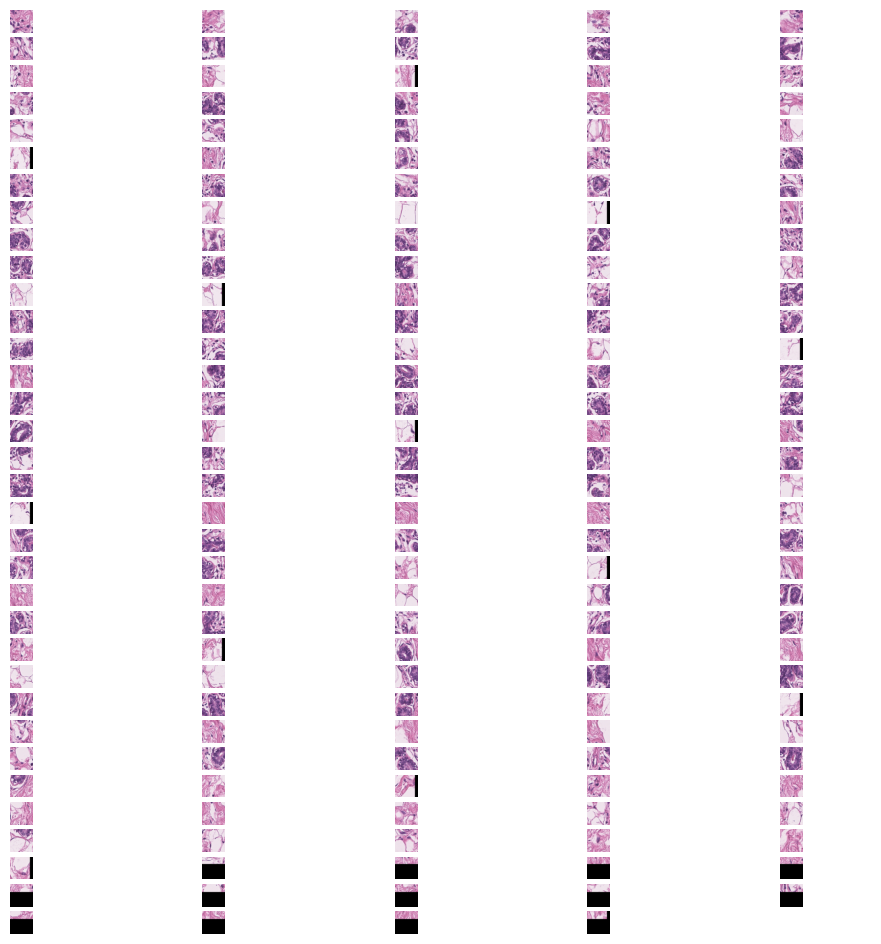

In [9]:
plot_patches(patches)

In [10]:
def split_image_into_patches(folder_path, target_folder_path, patch_size=224):
    """
    Split images in a folder into patches of a specified size.
    
    Args:
        folder_path (str): Path to the folder containing images.
        target_folder_path (str): Path to the folder where the patches will be saved.
        patch_size (int, optional): Size of the patches in pixels. Default is 224.
    """
    os.makedirs(target_folder_path, exist_ok=True)
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        img = Image.open(image_path)
        
        width, height = img.size
        
        # Calculate the number of patches in each dimension
        num_patches_w = width // patch_size
        num_patches_h = height // patch_size
        
        # Split the image into patches
        for i in range(num_patches_h):
            for j in range(num_patches_w):
                left = j * patch_size
                top = i * patch_size
                right = left + patch_size
                bottom = top + patch_size
                
                patch = img.crop((left, top, right, bottom))
                patch_filename = f"{os.path.splitext(filename)[0]}_{i}_{j}.png"
                patch_path = os.path.join(target_folder_path, patch_filename)
                patch.save(patch_path)

In [11]:
for split in SPLITS:
    for folder in FOLDERS:
        print(f"Processing {split} {folder}")
        folder_path = f"{DATA_DIR}/{split}/{folder}"
        target_folder_path = f"{TARGET_DIR}/{split}/{folder}"
        split_image_into_patches(folder_path, target_folder_path)

Processing val 0_N


FileNotFoundError: [Errno 2] No such file or directory: '/home/abdelnour/Documents/4eme_anne/S2/projet/data/val/0_N'

In [15]:
for split in SPLITS:
        for folder in FOLDERS:
            print(f"Processing {split} {folder}")
            folder_path = os.path.join(DATA_DIR, split, folder)
            target_folder_path = os.path.join(TARGET_DIR, split, folder)
            os.makedirs(target_folder_path, exist_ok=True)
            for file in os.listdir(folder_path):
                img = Image.open(os.path.join(folder_path, file))
                patches = split_image_into_patches(img, 224)
                for i, patch in enumerate(patches):
                    patch.save(os.path.join(target_folder_path, f"{file.split('.')[0]}_{i}.png"))

Processing train 0_N


TypeError: Cannot handle this data type: (1, 1, 224, 3), <i4